## 1. Feladatsor (interpoláció: Lagrange, Newton, Horner)

Miért szeretjük a polinomokat? A kurzus keretében többek között azért, mert jól lehet velük függvényeket közelíteni és könnyű őket integrálni, deriválni.

#### 1. Feladat

Tegyük fel, hogy egy függvény grafikonjának, mint halmaznak része a $\{(-1, 1), (0,0), (1, 1) \}$ halmaz, azaz a megfelelő pontokban a megfelelő értékeket veszi fel.

Ezen adatok ismeretében adjunk nullad-, első-, másod-, és harmadfokú polinom alakú közelítését ennek a függvénynek! Keressük a megfelelő polinomokat $x \mapsto \sum\limits_{k=0}^{\ldots} c_k x^k$ alakban. Adott fokszám mellett próbáljuk meghatározni a "legjobb" közelítést, ha van ilyen.

In [1]:
# Ac = b egyenletrendszer felirasa,
# 
# lsd. a kovetkezo feladat kodjat 

#### 2. Feladat
Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorok és $n$ fokszám esetén meghatározza egy, ezekre -lehetőleg a legjobban- illeszkedő polinom együtthatóit.

In [2]:
function poly_fit(n, xs, ys)
    # xs: alappontok, m hosszú vektor
    # ys: alappontokba óhajtott értékek, m hosszú vektor
    # n: fokszám, nemnegatív egész

    A = xs .^ (0:n)'
    b = ys
    return A \ b
end

poly_fit (generic function with 1 method)

In [3]:
# 1 + x^2 + 3x^3
xs = 1:10
ys = 1 .+ xs.^2 .+ 3*xs.^3

poly_fit(4, xs, ys)

5-element Vector{Float64}:
  1.0000000000024007
 -1.887585316304683e-12
  1.0000000000004854
  2.99999999999995
  1.8258555762217863e-15

### Interpolációs-polinom
Láttuk, hogy bizonyos esetekben találhatunk pontosan egy olyan polinomot, ami az adott (alap)pontokban pontosan az elvárt értékeket veszi fel. Ekkor ezt az (egyértelmű) polinomot interpolációs-polinomnak nevezzük, mely elnevezés magában hordozza azt is, hogy a kapott polinomot az alappontok konvex burkán tekintjük.

#### Az alappontokról

A **Weierstrass-tétel** szerint minden $[-1, 1] \to \mathbb{R}$ folytonos függvény egyenletesen, tetszőleges pontossággal megközelíthető polinomokkal.

Gondolhatnánk, hogy ennek bizonyítása lehetne az, hogy adott $n>0$ egész esetén veszünk egy $n+1$ pontból álló, egyenletes rácsot a $[-1, 1]$ intervallumon, majd ezekre $n$-edfokú polinomot illesztünk és készen vagyunk, de sajnos ez nincs így.

#### 3. Feladat
Tekintsük az $$f(x) = \frac{1}{1 + 25x^2}$$ függvényt a $[-1, 1]$ intervallumon. Írjunk programot, ami adott $n$ esetén  az intervallum egy $n+1$ elemű, egyenletes rácsán felvett értékek alapján (a kedvenc programnyelvünk beépített parancsával) $n$-edfokú polinomot illeszt erre a függvényre. 

Ábrázoljuk a kapott polinomokat $n=2,4,8,10$ esetén. Mit tapasztalunk?

In [4]:
using Polynomials
using Plots

In [5]:
f(x) = 1 / (1 + 25*x^2)
xx = 2*(0:128)/128 .- 1

-1.0:0.015625:1.0

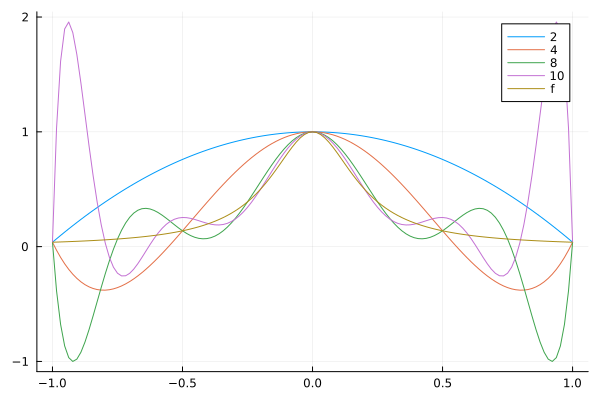

In [6]:
plot()
for n=[2,4, 8, 10]
    xs = 2*(0:n)/n .- 1
    p = fit(xs, f.(xs))
    plot!(xx, p.(xx), label=n)
end
plot!(xx, f.(xx), label="f")

Nézzük meg, hogy tudjuk-e reprodukálni a problémát akkor, ha a fenti képletben elhagyjuk a $25$-öt.

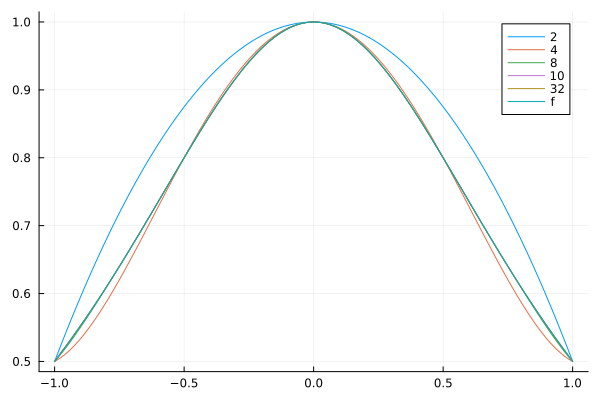

In [7]:
f_1(x) = 1/(1+(x)^2)

plot()
for n=[2,4, 8, 10, 32]
    xs = 2*(0:n)/n .- 1
    p = fit(xs, f_1.(xs))
    plot!(xx, p.(xx), label=n)
end
plot!(xx, f_1.(xx), label="f")

Magyarázat: a (nyílt) egységsugarú komplex körlapon a 25 nélküli definíciójú függvény analitikus, ezért az egyenletes rács jó.

A probléma az alappontok szerencsésebb megválasztásával orvosolható; például a Чебышёв-pontok jók.
#### 4. Feladat
Ismételjük meg a 3. feladatot, ezúttal egyenletes rács helyett Чебышёв-pontokkal, melyeknek a definíciója a következő:
$$ x_j = \cos\left(\frac{j\pi}{n}\right). \quad j=0,1,...,n.$$

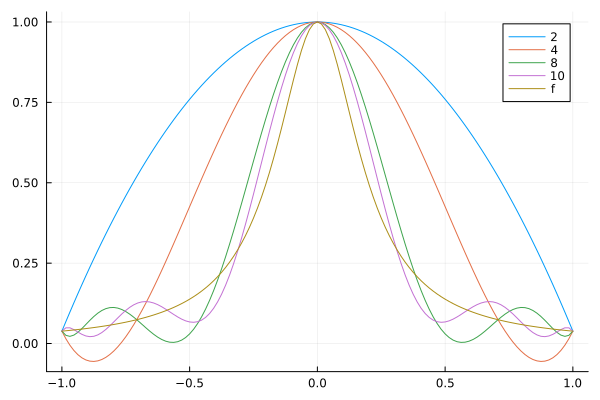

In [8]:
plot()
for n=[2, 4, 8, 10]
    xs = cos.(pi* ((0:n)/n))
    p = fit(xs, f.(xs))
    plot!(xx, p.(xx), label=n)
end
plot!(xx, f.(xx), label="f")

Bár a(z $x^k$ alakú) monomok természetes bázisát alkotják a polinomoknak, az interpolációs-polinomok esetén találhatunk ennél "jobb" bázisokat is.

Legyenek az alappontjaink $x_0, \ldots, x_n$; az interpolálandó értékek pedig legyenek $y_0, \ldots, y_{n}$. Az interpolációs polinomot jelölje $p_n$.

#### Az interpolációs polinom Lagrange-féle alakja
Az első ötlet, hogy keressünk olyan $n$-edfokú polinomokat, melyek pontosan egy alappontban vesznek fel nem nulla értéket (mégpedig egyet); legyen a $j$. ilyen polinom $l_j$. Az interpolációs polinom ekkor persze

$$p_n(x) = \sum\limits_{j=1}^{n+1} y_j \cdot l_j(x), $$

azaz ebben a bázisban az $(y_0, \ldots, y_{n})$ koordináták adják meg.

#### 5. Feladat
Írjuk fel a $-1, 0, 1$ pontokhoz tartozó $l_j$ polinomokat. Írjuk fel az interpolációs polinomot, ha ezekben a pontokban a felvett értékek rendre $1, 0, 1$. Melyik polinomot kaptuk vissza, milyen bázisban?

In [9]:
# a bázispolinomokat ábrázolva lásd lejjebb, a 7. feladat előtt

#### 6. Feladat
Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorokra interpolációs polinomot illeszt a Lagrange-alak használatával, majd egy további $z$ pontban kiértékeli azt.

In [28]:
using LinearAlgebra
function poly_fit_lagrange(xs, ys)
    # xs: alappontok, n+1 hosszú vektor
    # ys: alappontokba óhajtott értékek, n+1 hosszú vektor
    # z: a pont, ahol az interpolációs polinomot ki szeretnénk értékelni

    A = xs .- xs'
    # l_j polinomokat normalizalo sulyokkal osztas
    ws = ys ./ prod(A + I, dims=2)

    # segedmtx.
    XS = ones(length(xs)) .* xs'
    function P(z)
        B = z .- XS
        return sum(prod(B - diagm(diag(B)) + I, dims=2) .* ws)
    end

    return P
end

poly_fit_lagrange (generic function with 1 method)

In [29]:
xx = (0:200)/100 .- 1

-1.0:0.01:1.0

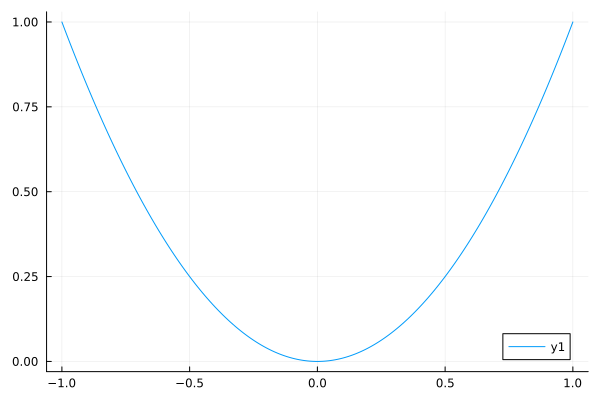

In [30]:
P = poly_fit_lagrange([-1, 0, 1], [1,0,1])
plot(xx, P.(xx))

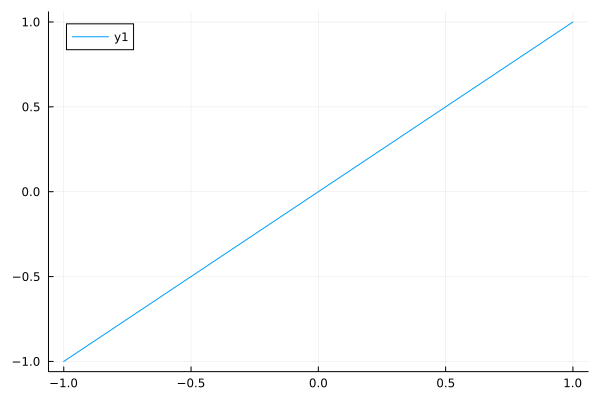

In [31]:
P = poly_fit_lagrange([-1, 0, 1], [-1,0,1])
plot(xx, P.(xx))

#### Lépésről lépésre:

In [32]:
xs = -1:1

-1:1

In [33]:
A = xs .- xs'

3×3 Matrix{Int64}:
 0  -1  -2
 1   0  -1
 2   1   0

In [16]:
# l_1, l_2, l_3 normalizalo sulyai
prod(A + I, dims=2)

3×1 Matrix{Int64}:
  2
 -1
  2

In [17]:
z = -1
B = ones(length(xs)) .* (z .- xs)'

3×3 Matrix{Float64}:
 0.0  -1.0  -2.0
 0.0  -1.0  -2.0
 0.0  -1.0  -2.0

In [18]:
B - diagm(diag(B)) + I

3×3 Matrix{Float64}:
 1.0  -1.0  -2.0
 0.0   1.0  -2.0
 0.0  -1.0   1.0

In [19]:
# l_1, l_2, l_3 ertekei az adott z pontban
vals = prod(B - diagm(diag(B)) + I, dims=2)

3×1 Matrix{Float64}:
  2.0
 -0.0
 -0.0

In [20]:
(vals ./ prod(A + I, dims=2))' * [1, 0, 1]

1-element Vector{Float64}:
 1.0

Az 5. feladatnál használandó bázispolinomokat is ábrázoltathatjuk:

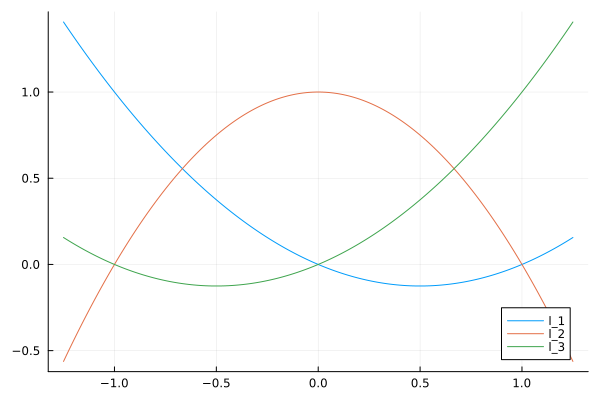

In [21]:
xx = ((0:200)/100 .- 1)*1.25
plot()
plot!(xx, poly_fit_lagrange([-1, 0, 1], [1,0,0]).(xx), label="l_1")
plot!(xx, poly_fit_lagrange([-1, 0, 1], [0,1,0]).(xx), label="l_2")
plot!(xx, poly_fit_lagrange([-1, 0, 1], [0,0,1]).(xx), label="l_3")

#### 7. Feladat
Gondoljuk meg, hogy mi történik akkor, ha a meglévő $(x_j, y_j)$ pontpárok mellett egy új pontpárt is szeretnénk figyelembe venni. Hogyan tudjuk a korábbi $l_j$ bázispolinomjainkat "frissíteni"?

In [22]:
# felszorzunk az uj gyoktenyezos alakkal, (x-x_{n+1})-gyel es leosztunk (x_j - x_{n+1})-gyel

#### Az interpolációs-polinom Newton-féle alakja

Hogyan tudunk olyan bázist készíteni, melyet könnyen "frissíthetünk" akkor, ha új pontpárunk érkezik?

Lássunk erre egy algoritmust.

Egyetlen $(x_0, y_0)$ pontpár esetén az interpolációs polinom konstans $y_0$.

Ha $p_n$ adott $n$-edfokú polinom, mely az $(x_0, \ldots, x_n)$ alappontokban rendre $(y_0, \ldots, y_n)$ értékeket vesz fel, akkor adjunk hozzá egy olyan eggyel magasabb fokú tagot, mely ezekben a pontokban $0$-t vesz fel, úgy, hogy az így keletkező polinom legyen az $x_{n+1}$ pontban $y_{n+1}$. Újra visszatérve tehát a gyöktényezős alak ötletéhez, legyen
   $$ p_{n+1}(x) = p_n(x) + c_{n+1}\cdot(x - x_0)(x-x_1)\cdots(x-x_n).$$

Ekkor $ p_{n+1}(x_j) = p_n(x_j) = y_j$ az utolsó kivételével minden $x_j$ pontban, ahol pedig
$$ p_{n+1}(x_{n+1}) = p_n(x_{n+1}) + c_{n+1} \cdot(x_{n+1} - x_0 ) \cdots (x_{n+1} - x_n).$$
Tehát amennyiben a
$$ c_{n+1} = \frac{y_{n+1} - p_n(x_{n+1})}{(x_{n+1} - x_0 ) \cdots (x_{n+1} - x_n)}$$
választással élünk, akkor meg is vagyunk.

Ha $$q_{j+1}(x) = (x - x_0 ) (x - x_1) \cdots (x - x_j),$$
akkor észrevehetjük, hogy a rekurzió
$$ p_{n+1} = p_n + c_{n+1} \cdot q_{n+1}$$
alakú, tehát a $p_n$ interpolációs polinomot ez esetben a $q_j$ báziselemek lineáris kombinációjaként fejezzük ki, mely bázis bővítése egyszerű.

#### 8. Feladat
Írjuk fel a $-1, 0, 1$ pontokhoz tartozó $q_j$ polinomokat. Írjuk fel az interpolációs polinomot, ha ezekben a pontokban a felvett értékek rendre $1, 0, 1$. Melyik polinomot kaptuk vissza, milyen bázisban?

In [23]:
# y_0 = y_0 = 1
#
# y_1 = y_0 + c*(x1-x0)
#   0 = 1 + c*(0 - (-1))
#   c = -1
# 
# maskent: c = (0 - 1)/(0 - (-1))
#
#
# y_2 = y_0 - c*(x2-x0) + d*(x2 - x0)*(x2 - x1)
#   1 = 1   - 1*(1 - (-1)) + d*(1 - (-1))*(1 - 0)
#   1 = 1   - 2 + d*2*1
#   d = 1

# interpolacios polinom: 1 - 1*(x-(-1)) + 1*(x-(-1))*(x-0)
#                      = 1 - x -1 + x*(x+1)
#                      = x^2

#### 9. Feladat
Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorokra interpolációs polinomot illeszt a Newton-alak használatával, majd egy további $z$ pontban kiértékeli azt.

In [24]:
function poly_fit_newton(xs, ys)
    # xs: alappontok, n+1 hosszú vektor
    # ys: alappontokba óhajtott értékek, n+1 hosszú vektor

    function p(k)
        if k == 0
            return z -> ys[1]
        else
            c = (ys[k+1] - p(k-1)(xs[k+1]))/prod(xs[k+1].- xs[1:k])
            return z -> p(k-1)(z) + c*prod(z .- xs[1:k])
        end
    end
    
    n = min(length(xs), length(ys)) - 1
    return p(n)
end

poly_fit_newton (generic function with 1 method)

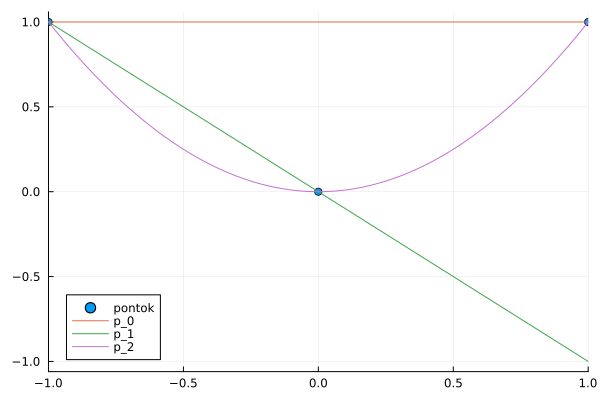

In [25]:
plot()
xs = [-1, 0, 1]
ys = [1, 0, 1]

plot!(xs, ys, seriestype=:scatter, label="pontok")
plot!(poly_fit_newton(xs[1:1], ys[1:1]), label="p_0", xlims=[-1,1])
plot!(poly_fit_newton(xs[1:2], ys[1:2]), label="p_1", xlims=[-1,1])
plot!(poly_fit_newton(xs[1:3], ys[1:3]), label="p_2", xlims=[-1,1])

#### 10. Feladat
Írjunk programot, mely egy polinomot a Horner-séma szerint értékel ki.

**Emlék:**
$$ c_0 + c_1 x + c_2 x^2 + \ldots \qquad \text{helyett} \qquad c_0 + x \left( c_1 + x \left( c_2 + \ldots \right) \right)$$

Hogyan alakul a műveletigénye a két megközelítésnek?

In [26]:
function horner_sema(cs, x)
    # cs: a polinom együtthatói
    # x: a pont ahol ki szeretnénk értékelni a polinomot
    
    accumulator = 0
    for c in reverse(cs[2:end])
        accumulator += c
        accumulator *= x
    end
    
    return accumulator + cs[1]
end

horner_sema (generic function with 1 method)

In [27]:
# 1 + 2*3 + 3*3^2
horner_sema([1,2,3], 3)

34

### Kiegészítés

#### 11. Feladat
Mutassuk meg, hogy $$l_j(x) = \frac{q_{n+1}(x)}{x-x_j} \cdot \frac{1}{q_{n+1}'(x_j)}.$$

A Newton-féle,
$$ p_{n+1}(x) = p_n(x) + c_{n+1}\cdot(x - x_0)(x-x_1)\cdots(x-x_n)$$

alakban előkerülő $c_n$ együtthatót szokás az $n$. osztott differenciának is nevezni. Ennek értéke függ mind az $x_j$ pontoktól, mind pedig az $y_j$ értékektől. Jelöljük az $i_1, \ldots i_k$ indexű pontpárokra épülő osztott differenciát $\delta_{i_1, \ldots, i_k}$-val; ha az indexek egymást követik, akkor használjuk a MATLAB-szerű $\delta_{n:n+k}$ jelölést (ezzel pl. $c_{n+1} = \delta_{0:n}$).



#### 12. Feladat
Mutassuk meg, hogy $$\delta_{0:k+1} = \frac{\delta_{1:k+1} - \delta_{0:k}}{x_{k+1} - x_0}.$$

#### 13. Feladat

Mutassuk meg, hogy ha $y_j = f(x_j)$ és $f$ elég szép, akkor

$$(x_0, \ldots, x_k) \to (\xi, \ldots, \xi) \quad \text{ esetén } \qquad \delta_{0:k} \to \frac{1}{k!}f^{(k)}(\xi).$$

#### 14. Feladat
Mutassuk meg, hogy az osztott differencia értéke nem függ az indexek sorrendjétől.